# Week 6

This week, we continue improving neural networks by improving their optimization process. Primarily, we study:

* Activations, Initializers, and Optimizers -- different activation functions and initializers have an impact on convergence
* Vanishing and Exploding Gradients -- when gradients of different layers vary tremendously, resulting in poor learning

## Lecture 11 - Activations, Initializers, and Optimizers

## Dropout, ADAM, etc.

A couple of features we learned about but never implemented in class are built into Keras, such as dropout (for regularization) and the ADAM optimizer, which adapts the learning rates to each parameter in an often-effective way.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
469/469 [===========================

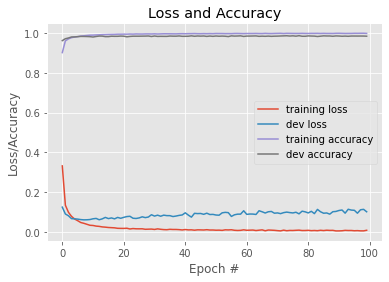

In [ ]:
# read in full MNIST
(trainX, trainY), (testX, testY) = mnist.load_data()

# reshape into vectors
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale the data to [0,1]
trainX = trainX/255.0
testX = testX/255.0

# convert the labels to one-hot form
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Create a feedforward neural net
model = Sequential()

# Create the layers
model.add(Dense(256, activation = 'relu', input_shape=(trainX.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# print a model summary
model.summary()

# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = maxEpoch, batch_size = 128)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

## The CIFAR-10 Dataset

The CIFAR-10 dataset includes 60,000 colored images of size 32-by-32 pixels. Each pixel of the image has a red, a green, and a blue value, so the dimension of each image is 32 x 32 x 3 = 3072, where each RGB value of each pixel is a number between 0 and 255.

The images are classified as one of 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or truck.

<img src = 'cifar10.png' />


By looking at some of the images, it should become clear that using an algorithm to classify this dataset should be significantly harder than classifying MNIST because there is much more variation in images within each class than in MNIST.

In [5]:
from tensorflow.keras.datasets import cifar10 

cifarData = cifar10.load_data()

# 1st index: training [0] and testing [1] data and labels
# 2nd index: datapoints [0] and labels [1]
# 3rd index: image from the set (0-49999) for training and (0-9999) for testing
# 4th index: column of RGB triples for pixels in column (0-32)
# 5th index: RGB triple for each pixel in column (0-32)
# 6th index: R for pixel, G for pixel, B for pixel (0-2)

In [18]:
cifarData[0][0][0][0][0][2]

63

The label is [6]


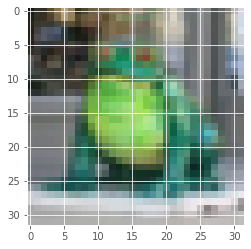

In [19]:
# DISPLAY MNIST PICTURES, DATA ARRAYS, AND LABELS
from IPython.display import clear_output
from keyboard import wait

for counter in range(20):
    pictureData = cifarData[0][0][counter]
    # plot the datapoints and their labels
    print('The label is', cifarData[0][1][counter])
    #print(pictureData)

    # plot the image
    plt.imshow(pictureData)
    plt.show()
    
    # wait until user presses 'q'
    wait('q')
    
    # clear the input
    clear_output(wait=True)

In [28]:
cifarData[0][0][:1000].shape

(1000, 32, 32, 3)

In [29]:
# read in full CIFAR-10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

# reshape into vectors
trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))

# scale the data to [0,1]
trainX = trainX/255.0
testX = testX/255.0

# convert the labels to one-hot form
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8651 - accuracy: 0.3279 - val_loss: 1.7543 - val_accuracy: 0.3682
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6711 - accuracy: 0.4007 - val_loss: 1.5904 - val_accuracy: 0.4269
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5939 - accuracy: 0.4292 - val_loss: 1.5907 - val_accuracy: 0.4290
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5438 - accuracy: 0.4474 - val_loss: 1.5906 - val_accuracy: 0.4165
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5241 - accuracy: 0.4540 - val_loss: 1.5225 - val_accuracy: 0.4551
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4932 - accuracy: 0.4682 - val_loss: 1.5191 - val_accuracy: 0.4658
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4736 - accuracy: 0.4736 - val_loss: 1.5048 - val_accuracy:

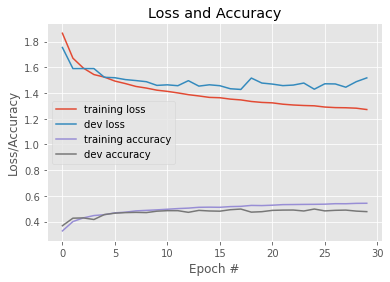

In [31]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 30
H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As we will see, sometimes the simpler tools just do a better job!

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.1750 - val_loss: 0.0875 - val_accuracy: 0.2640
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0859 - accuracy: 0.2548 - val_loss: 0.0845 - val_accuracy: 0.2713
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0832 - accuracy: 0.3003 - val_loss: 0.0821 - val_accuracy: 0.3050
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0814 - accuracy: 0.3226 - val_loss: 0.0806 - val_accuracy: 0.3359
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0801 - accuracy: 0.3373 - val_loss: 0.0795 - val_accuracy: 0.3530
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0792 - accuracy: 0.3511 - val_loss: 0.0786 - val_accuracy: 0.3559
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0784 - accuracy: 0.3591 - val_loss: 0.0779 - val_accuracy:

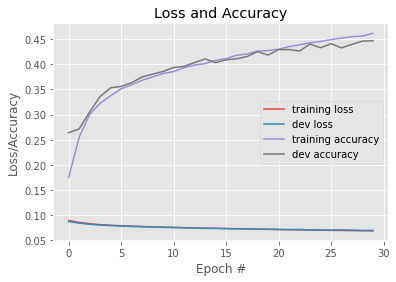

In [32]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))

# train with SGD
opt = SGD(learning_rate = 0.05, momentum = 0.9)
model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['accuracy'])

# train the model
maxEpoch = 30
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

This works significantly better, but we see there is still a lot of overfitting. Maybe Dropout will help regularize the model.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/60
1563/1563 [==============================] - 6s 3ms/step - loss: 0.0913 - accuracy: 0.1179 - val_loss: 0.0887 - val_accuracy: 0.1978
Epoch 2/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.1728 - val_loss: 0.0861 - val_accuracy: 0.2660
Epoch 3/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.2119 - val_loss: 0.0841 - val_accuracy: 0.2911
Epoch 4/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.2470 - val_loss: 0.0827 - val_accuracy: 0.3056
Epoch 5/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.2702 - val_loss: 0.0816 - val_accuracy: 0.3075
Epoch 6/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.2893 - val_loss: 0.0808 - val_accuracy: 0.3273
Epoch 7/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0818 - accuracy: 0.2999 - val_loss: 0.0801 - val_accuracy:

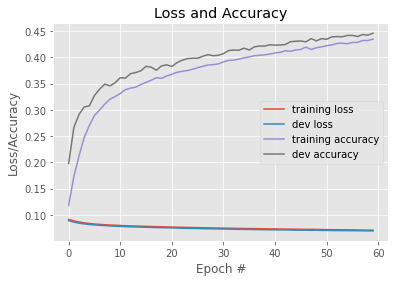

In [39]:
# define the 3072-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape = (3072,), activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'sigmoid'))

# train with SGD
opt = SGD(lr = 0.05, momentum = 0.9)
model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['accuracy'])

# train the model
maxEpoch = 60
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

It's also simple to implement different initializers, regularizers, etc. The code below doesn't result in great performance, but it does demonstrate these capabilities.

Epoch 1/60
1563/1563 [==============================] - 6s 3ms/step - loss: 0.0957 - accuracy: 0.1343 - val_loss: 0.0948 - val_accuracy: 0.2274
Epoch 2/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0938 - accuracy: 0.1917 - val_loss: 0.0926 - val_accuracy: 0.2014
Epoch 3/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0915 - accuracy: 0.2319 - val_loss: 0.0905 - val_accuracy: 0.2670
Epoch 4/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0897 - accuracy: 0.2675 - val_loss: 0.0888 - val_accuracy: 0.2881
Epoch 5/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.2871 - val_loss: 0.0875 - val_accuracy: 0.3060
Epoch 6/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.3053 - val_loss: 0.0865 - val_accuracy: 0.3230
Epoch 7/60
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.3214 - val_loss: 0.0857 - val_accuracy:

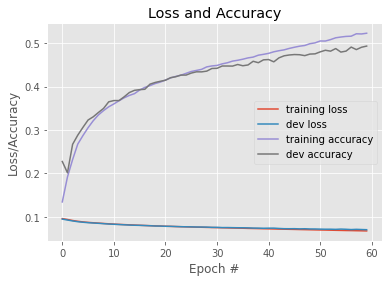

In [40]:
from tensorflow.keras.initializers import RandomUniform

# define the 3072-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256,
                input_shape=(3072,),
                kernel_initializer = RandomUniform(minval=-0.1, maxval=0.1),
                bias_initializer = RandomUniform(minval=-0.1, maxval=0.1),
                kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.1/50000),
                bias_regularizer = l1_l2(l1 = 0.0, l2 = 0.1/50000),
                activation="sigmoid"))

model.add(Dense(128, kernel_initializer = RandomUniform(minval=-0.1, maxval=0.1),
                kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.1/50000), bias_regularizer = l1_l2(l1 = 0.0, l2 = 0.1/50000),
                bias_initializer = RandomUniform(minval=-0.1, maxval=0.1), activation="sigmoid"))

model.add(Dense(10, kernel_initializer = RandomUniform(minval=-0.1, maxval=0.1),
                bias_initializer = RandomUniform(minval=-0.1, maxval=0.1),
                kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.1/50000), bias_regularizer = l1_l2(l1 = 0.0, l2 = 0.1/50000),
                activation="sigmoid"))

# train with SGD
opt = SGD(learning_rate = 0.05, momentum = 0.9)
model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['accuracy'])

# train the model
maxEpoch = 60
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

# Lecture 12 - Sept 28 - Vanishing and Exploding Gradients

**Deep** neural networks (i.e. models with many hidden layers) offer an opportunity to learn much more complex patterns in high-dimensional data. However, training deep networks presents some challenges. It is difficult to maintain gradients throughout the network that allow the many parameters of the model to learn in an effective manner.

In particular, we have learned that backpropagation starts with the output layer where the loss is computed, and propagates the loss backward through the network, computing the partial derivatives with respect to the weights just before the output layer, then weights in the previous layer, and the previous layer, and so on, until we reach the weights coming from the input layer. Recall, the partial derivatives propagate backwards as

$$\delta^l=\left(\left(w^{l+1}\right)^T\delta^{l+1}\right) \odot \sigma'\left(z^l\right)$$

where $\sigma$ is a common activation function for each neuron. This indicates the partial derivatives for weights in layer $l$ are the partial derivatives in layer $l+1$ multiplied by several terms.

Mathematically speaking, each partial derivative is constructed by repeated multiplication, with earlier layers made up of products of more terms. Repeated multiplication is inherently pretty unstable:

* If just one term nears 0, the whole product might **vanish** to 0
* If just one term grows a lot, the whole product might **explode** to a high value

In other words, the gradients are at risk to vanish or explode during the training process.

If the partial derivatives for the earlier weights vanish (go to 0), these weights will have gradient-based weight updates near 0, meaning the weights get stuck. Hence, the corresponding weights do not learn anything and our (expensive) backprop calculations cost a lot of time without yielding benefits.

If the partial derivatives for any weights explore (get very large), these weights will have huge gradient-based weight updates, sending the weights to large values. Note that backpropagation involves multiplications by the weights, causing the gradients to get even larger leading the model to blow up and cause overflows.

In the first case, the model may learn, but we waste computation. In the second case, the model doesn't converge at all. In both cases, deep nets can fail to live up to their potential.

**(See more details on this issue and mitigating it in class.)**

# Using Keras

Since computation is a bottleneck for neural nets, it is worthwhile to learn to construct neural nets with a dedicated deep learning framework rather than simply raw Python with NumPy, as we have used so far, because they allow highly optimized computation accelerated by graphics processing units (GPUs) and let us create nets quickly and easily.

As of now, the most popular solutions are Meta's PyTorch and Google's TensorFlow with Keras. (There are some other solutions like Theano, Caffe, and MXNet as well.) Both have two main parts: (1) highly optimized tensor computing, including matrix multiplication and (2) simple functionality for creating neural networks with optimized backpropagation.

We will use Keras today.

### Writing a Fully-connected Feedforward Neural Net with Keras

We will aim to write a neural net similar to what we have constructed through the course so far. That is, it should feed data forward through a sequence of layers, the layers should be fully connected (dense), and we should use SGD to optimize it. We can import these things directly from Keras.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report

Let's construct the net to classify MNIST (our beloved benchmarking dataset) on a vanilla neural network (SGD, sigmoid, SSE loss) with two hidden layers

In [2]:
# Create a feedforward neural net
model = Sequential()

# Create the layers
model.add(Dense(256, activation = 'sigmoid', input_shape=(784,))) # hidden layer 1
model.add(Dense(128, activation = 'sigmoid')) # hidden layer 2
model.add(Dense(10, activation = 'sigmoid')) # output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'mean_squared_error', optimizer = SGD(0.5), metrics = ['accuracy'])

# print a summary of the model
model.summary()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Now, let's read in MNIST

In [8]:
# read in full MNIST
(trainX, trainY), (testX, testY) = mnist.load_data()

# reshape into vectors
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale the data to [0,1]
trainX = trainX/255.0
testX = testX/255.0

# convert the labels to one-hot form
trainY = to_categorical(trainY)
testY = to_categorical(testY)

Next, let's classify MNIST with our vanilla net.

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0907 - accuracy: 0.1746 - val_loss: 0.0889 - val_accuracy: 0.1704
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0882 - accuracy: 0.2961 - val_loss: 0.0873 - val_accuracy: 0.3140
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0858 - accuracy: 0.3623 - val_loss: 0.0836 - val_accuracy: 0.3817
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0801 - accuracy: 0.4193 - val_loss: 0.0754 - val_accuracy: 0.4834
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0705 - accuracy: 0.5313 - val_loss: 0.0649 - val_accuracy: 0.5698
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0604 - accuracy: 0.6199 - val_loss: 0.0556 - val_accuracy: 0.6655
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0524 - accuracy: 0.6886 - val_loss: 0.0487 - val_accuracy: 0.7155

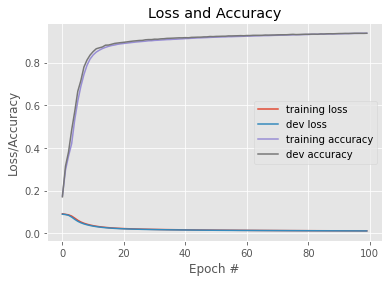

In [9]:
# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = maxEpoch, batch_size = 128)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(np.range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(np.range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(np.range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(np.range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Let's try a more modern version using ReLU and softmax layers with categorical crossentropy loss, the ADAM optimizer, and both $L^1$ and $L^2$ regularization.

In [34]:
# Create a feedforward neural net
model = Sequential()

# Create the layers
model.add(Dense(256, input_shape = (784,), activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

# compile the model by choosing how the optimizer works
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Let's use this more modern network to classify MNIST

Epoch 1/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.9237 - val_loss: 0.1747 - val_accuracy: 0.9605
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.9680 - val_loss: 0.1374 - val_accuracy: 0.9731
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1240 - accuracy: 0.9773 - val_loss: 0.1306 - val_accuracy: 0.9753
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9826 - val_loss: 0.1271 - val_accuracy: 0.9758
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0954 - accuracy: 0.9857 - val_loss: 0.1237 - val_accuracy: 0.9770
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9876 - val_loss: 0.1144 - val_accuracy: 0.9801
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9898 - val_loss: 0.1109 - val_accuracy: 0.9797

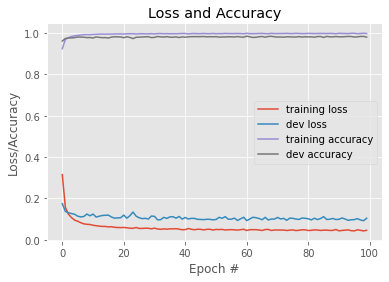

In [35]:
# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = maxEpoch, batch_size = 128)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(np.arange(0, maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(np.arange(0, maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(np.arange(0, maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(np.arange(0, maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As expected, this is a little better.